# Simulation

In [1]:
library(cowplot)
library(dplyr)
library(ggplot2)
library(purrr)
library(randomForest)
library(tidyr)
library(veesa)
library(ggplot2)
library(patchwork)
library(neuralnet)
library(reticulate)
library(keras3)
library(tensorflow)
tf$config$list_physical_devices("CPU")
options(warn=-1)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


The following object is masked from 'package:dplyr':

    combine



Attaching package: 'patchwork'


The following object is masked from 'package:cowplot':

    align_plots



Attaching package: 'neuralnet'


The following object is masked from 'package:dplyr':

    compute



Attaching package: 'tensorflow'


The following objects are masked from 'package:keras3':

    set_random_seed, shape




[[1]]
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')


In [2]:
# Specify a color palette
color_pal = wesanderson::wes_palette("Zissou1", 5, type = "continuous")

# Specify colors for PC direction plots
col_plus1 = "#784D8C"
col_plus2 = "#A289AE"
col_minus1 = "#EA9B44"
col_minus2 = "#EBBC88"
col_pcdir_1sd = c(col_plus1, "black", col_minus1)
col_pcdir_2sd = c(col_plus2, col_plus1, "black", col_minus1, col_minus2)

In [3]:
sim_data = simulate_functions(M = 100, N = 75, seed = 36) # 100 x 75 = 7500 rows
head(sim_data)

,id,t,y,x1,x2,x3
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.00000000,8.668609e-09,0.5691806,0.2411876,-0.05004546
2,1,0.01351351,4.230084e-08,0.5691806,0.2411876,-0.05004546
3,1,0.02702703,1.918780e-07,0.5691806,0.2411876,-0.05004546
4,1,0.04054054,8.090543e-07,0.5691806,0.2411876,-0.05004546
5,1,0.05405405,3.171077e-06,0.5691806,0.2411876,-0.05004546
6,1,0.06756757,1.155347e-05,0.5691806,0.2411876,-0.05004546


id = Printer ID (All different printers)

t = Wavenumber (cm⁻¹) in Raman spectra

y = Intensity at each wavenumber

x1, x2, x3 = Physical properties of ink/paper

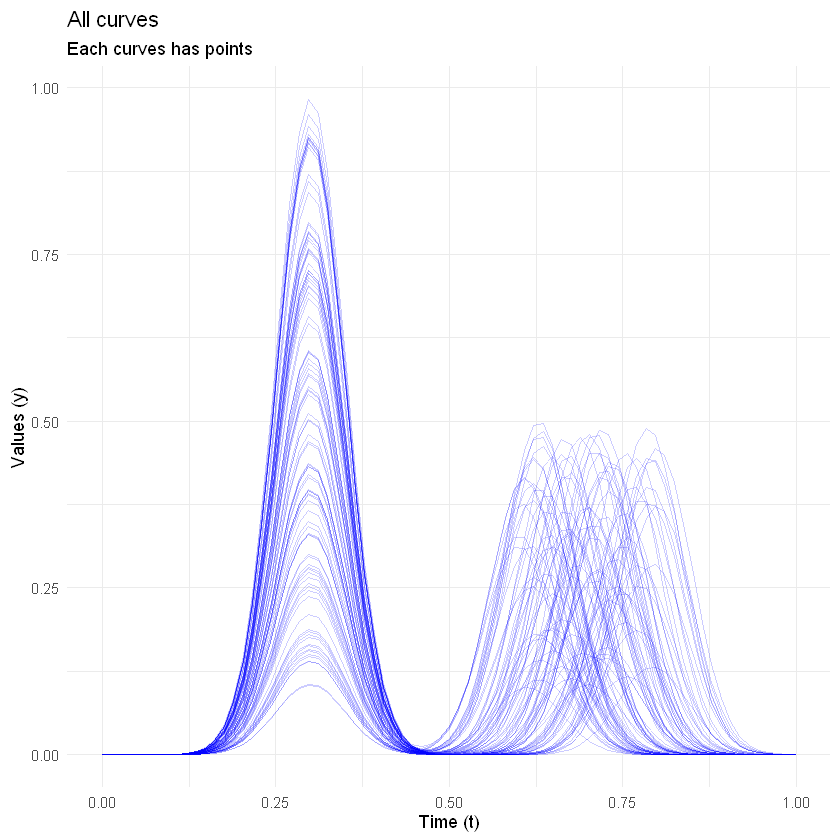

In [4]:
# Plot all curves in sim_data
ggplot(sim_data, aes(x = t, y = y, group = id)) +
  geom_line(alpha = 0.2, linewidth = 0.3, color = "blue") +
  labs(title = "All curves",
       subtitle = "Each curves has points",
       x = "Time (t)", 
       y = "Values (y)") +
  theme_minimal()

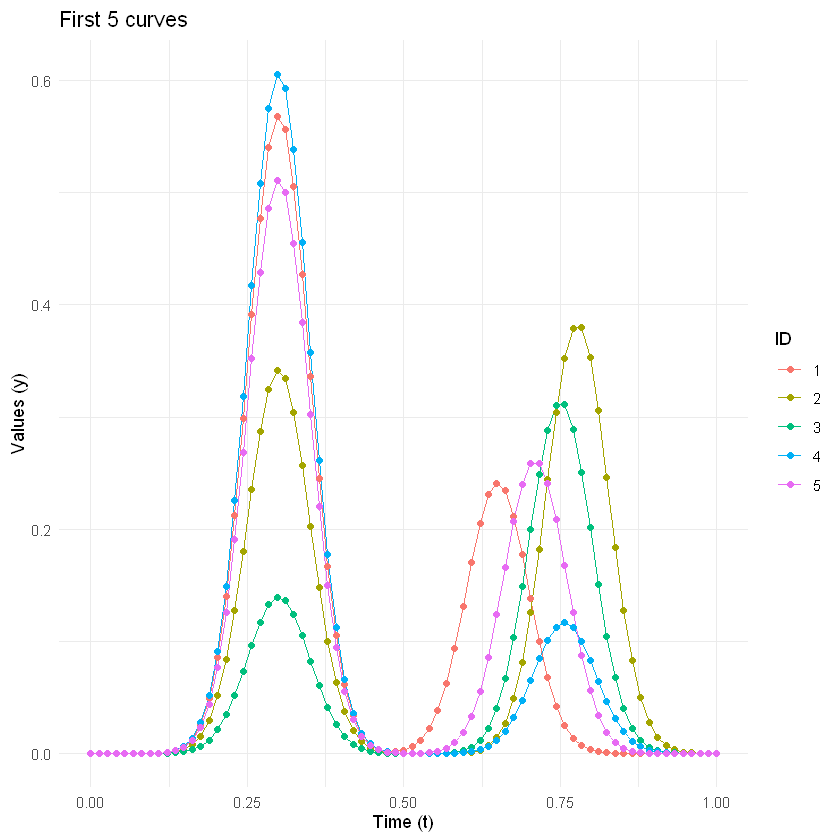

In [11]:
num <- 5
first_5_ids <- head(unique(sim_data$id), num)

ggplot(sim_data[sim_data$id %in% first_5_ids, ],  # Chọn trực tiếp trong data
       aes(x = t, y = y, color = factor(id), group = id)) +
  geom_line(linewidth = 0.3) +
  geom_point(size = 1.5) +
  labs(title = paste("First", num, "curves"),
       x = "Time (t)", y = "Values (y)", color = "ID") +
  theme_minimal()